In [35]:
import pandas as pd 
import numpy as np
import warnings 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
warnings.filterwarnings('ignore')

### 1. Data explorations

In [36]:
data = pd.read_csv('5gqos.csv')
data.columns

Index(['Timestamp', 'User_ID', 'Application_Type', 'Signal_Strength',
       'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth',
       'Resource_Allocation'],
      dtype='object')

In [37]:
data.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,-75 dBm,30 ms,10 Mbps,15 Mbps,70%
1,9/3/2023 10:00,User_2,Voice_Call,-80 dBm,20 ms,100 Kbps,120 Kbps,80%
2,9/3/2023 10:00,User_3,Streaming,-85 dBm,40 ms,5 Mbps,6 Mbps,75%
3,9/3/2023 10:00,User_4,Emergency_Service,-70 dBm,10 ms,1 Mbps,1.5 Mbps,90%
4,9/3/2023 10:00,User_5,Online_Gaming,-78 dBm,25 ms,2 Mbps,3 Mbps,85%


In [38]:
data.tail()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
395,9/3/2023 10:06,User_396,Streaming,-110 dBm,61 ms,1.3 Mbps,1.8 Mbps,85%
396,9/3/2023 10:06,User_397,Video_Call,-40 dBm,53 ms,14.5 Mbps,15.8 Mbps,75%
397,9/3/2023 10:06,User_398,Video_Streaming,-113 dBm,58 ms,1.0 Mbps,1.4 Mbps,70%
398,9/3/2023 10:06,User_399,Emergency_Service,-40 dBm,5 ms,0.4 Mbps,0.4 Mbps,70%
399,9/3/2023 10:06,User_400,Web_Browsing,-113 dBm,0 ms,0.1 Mbps,0.1 Mbps,70%


In [39]:
data.describe().T

,count,unique,top,freq
Timestamp,400,7,9/3/2023 10:01,60
User_ID,400,400,User_1,1
Application_Type,400,11,Video_Call,58
Signal_Strength,400,84,-97 dBm,9
Latency,400,87,5 ms,35
Required_Bandwidth,400,188,0.1 Mbps,16
Allocated_Bandwidth,400,194,0.1 Mbps,16
Resource_Allocation,400,9,70%,148


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            400 non-null    object
 1   User_ID              400 non-null    object
 2   Application_Type     400 non-null    object
 3   Signal_Strength      400 non-null    object
 4   Latency              400 non-null    object
 5   Required_Bandwidth   400 non-null    object
 6   Allocated_Bandwidth  400 non-null    object
 7   Resource_Allocation  400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


In [41]:
data.isnull().sum()

Timestamp              0
User_ID                0
Application_Type       0
Signal_Strength        0
Latency                0
Required_Bandwidth     0
Allocated_Bandwidth    0
Resource_Allocation    0
dtype: int64

#### 1.1 Unique Values

In [42]:
data['User_ID'].nunique()

400

In [43]:
data['Application_Type'].unique()

array(['Video_Call', 'Voice_Call', 'Streaming', 'Emergency_Service',
       'Online_Gaming', 'Background_Download', 'Web_Browsing',
       'IoT_Temperature', 'Video_Streaming', 'File_Download', 'VoIP_Call'],
      dtype=object)

In [44]:
data['Application_Type'].nunique()

11

In [45]:
data['Signal_Strength'].unique()

array(['-75 dBm', '-80 dBm', '-85 dBm', '-70 dBm', '-78 dBm', '-90 dBm',
       '-88 dBm', '-95 dBm', '-82 dBm', '-76 dBm', '-79 dBm', '-87 dBm',
       '-81 dBm', '-74 dBm', '-84 dBm', '-69 dBm', '-91 dBm', '-96 dBm',
       '-83 dBm', '-77 dBm', '-86 dBm', '-73 dBm', '-68 dBm', '-92 dBm',
       '-97 dBm', '-72 dBm', '-67 dBm', '-93 dBm', '-98 dBm', '-71 dBm',
       '-66 dBm', '-94 dBm', '-99 dBm', '-89 dBm', '-65 dBm', '-100 dBm',
       '-64 dBm', '-101 dBm', '-63 dBm', '-102 dBm', '-62 dBm',
       '-103 dBm', '-61 dBm', '-104 dBm', '-60 dBm', '-59 dBm', '-58 dBm',
       '-57 dBm', '-56 dBm', '-55 dBm', '-54 dBm', '-53 dBm', '-52 dBm',
       '-51 dBm', '-105 dBm', '-50 dBm', '-106 dBm', '-107 dBm',
       '-49 dBm', '-108 dBm', '-109 dBm', '-48 dBm', '-110 dBm',
       '-111 dBm', '-47 dBm', '-112 dBm', '-113 dBm', '-46 dBm',
       '-114 dBm', '-115 dBm', '-45 dBm', '-116 dBm', '-44 dBm',
       '-117 dBm', '-118 dBm', '-43 dBm', '-119 dBm', '-42 dBm',
       '-120 dBm', '-121

In [46]:
data['Signal_Strength'].nunique()

84

In [47]:
data['Latency'].unique()

array(['30 ms', '20 ms', '40 ms', '10 ms', '25 ms', '50 ms', '100 ms',
       '35 ms', '45 ms', '32 ms', '24 ms', '28 ms', '22 ms', '29 ms',
       '38 ms', '9 ms', '48 ms', '105 ms', '34 ms', '31 ms', '23 ms',
       '21 ms', '37 ms', '8 ms', '47 ms', '110 ms', '33 ms', '27 ms',
       '36 ms', '7 ms', '46 ms', '26 ms', '104 ms', '103 ms', '102 ms',
       '19 ms', '6 ms', '44 ms', '101 ms', '18 ms', '43 ms', '17 ms',
       '42 ms', '99 ms', '5 ms', '49 ms', '51 ms', '52 ms', '53 ms',
       '54 ms', '55 ms', '56 ms', '39 ms', '16 ms', '57 ms', '15 ms',
       '58 ms', '41 ms', '14 ms', '59 ms', '13 ms', '60 ms', '12 ms',
       '61 ms', '11 ms', '62 ms', '63 ms', '64 ms', '65 ms', '66 ms',
       '67 ms', '68 ms', '4 ms', '69 ms', '3 ms', '70 ms', '2 ms',
       '71 ms', '1 ms', '72 ms', '0 ms', '73 ms', '74 ms', '75 ms',
       '76 ms', '77 ms', '78 ms'], dtype=object)

#### 1.2 Data Cleaning Using Reguler Expression (Regex)

In [48]:
data['Signal_Strength'] = data['Signal_Strength'].str.extract('(\d+)').astype(int)
data['Latency'] = data['Latency'].str.extract('(\d+)').astype(int)
data['Resource_Allocation'] = data['Resource_Allocation'].str.extract('(\d+)').astype(int)
data.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation
0,9/3/2023 10:00,User_1,Video_Call,75,30,10 Mbps,15 Mbps,70
1,9/3/2023 10:00,User_2,Voice_Call,80,20,100 Kbps,120 Kbps,80
2,9/3/2023 10:00,User_3,Streaming,85,40,5 Mbps,6 Mbps,75
3,9/3/2023 10:00,User_4,Emergency_Service,70,10,1 Mbps,1.5 Mbps,90
4,9/3/2023 10:00,User_5,Online_Gaming,78,25,2 Mbps,3 Mbps,85


In [49]:
# Converting Required_Bandwidth Unit from Mbps to Kbps
# Create two columns from required bandwidth

data[['Size','Unit']] = data.Required_Bandwidth.str.split(' ', expand=True)
data['Size'] = data.Size.astype(float)
data.Unit.replace({'Mbps':1024, 'Kbps':1}, inplace=True)
data.head()


,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Size,Unit
0,9/3/2023 10:00,User_1,Video_Call,75,30,10 Mbps,15 Mbps,70,10.0,1024
1,9/3/2023 10:00,User_2,Voice_Call,80,20,100 Kbps,120 Kbps,80,100.0,1
2,9/3/2023 10:00,User_3,Streaming,85,40,5 Mbps,6 Mbps,75,5.0,1024
3,9/3/2023 10:00,User_4,Emergency_Service,70,10,1 Mbps,1.5 Mbps,90,1.0,1024
4,9/3/2023 10:00,User_5,Online_Gaming,78,25,2 Mbps,3 Mbps,85,2.0,1024


In [50]:
# Converting Required_Bandwidth Unit from Mbos to Kbps

data['Required_Bandwidth_Size_in_KB'] = data.Size * data.Unit
data.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Size,Unit,Required_Bandwidth_Size_in_KB
0,9/3/2023 10:00,User_1,Video_Call,75,30,10 Mbps,15 Mbps,70,10.0,1024,10240.0
1,9/3/2023 10:00,User_2,Voice_Call,80,20,100 Kbps,120 Kbps,80,100.0,1,100.0
2,9/3/2023 10:00,User_3,Streaming,85,40,5 Mbps,6 Mbps,75,5.0,1024,5120.0
3,9/3/2023 10:00,User_4,Emergency_Service,70,10,1 Mbps,1.5 Mbps,90,1.0,1024,1024.0
4,9/3/2023 10:00,User_5,Online_Gaming,78,25,2 Mbps,3 Mbps,85,2.0,1024,2048.0


In [51]:
data.drop(columns='Size',inplace=True)
data.drop(columns='Unit',inplace=True)
data.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Required_Bandwidth_Size_in_KB
0,9/3/2023 10:00,User_1,Video_Call,75,30,10 Mbps,15 Mbps,70,10240.0
1,9/3/2023 10:00,User_2,Voice_Call,80,20,100 Kbps,120 Kbps,80,100.0
2,9/3/2023 10:00,User_3,Streaming,85,40,5 Mbps,6 Mbps,75,5120.0
3,9/3/2023 10:00,User_4,Emergency_Service,70,10,1 Mbps,1.5 Mbps,90,1024.0
4,9/3/2023 10:00,User_5,Online_Gaming,78,25,2 Mbps,3 Mbps,85,2048.0


In [52]:
# Converting Allocated_Bandwidth Unit from Mbps to Kbps

data[['Size1','Unit1']] = data.Allocated_Bandwidth.str.split(' ', expand=True)
data['Size1'] = data.Size1.astype(float)
data.Unit1.replace({'Mbps':1024, 'Kbps':1}, inplace=True)
data['Allocated_Bandwidth_Size_in_KB'] = data.Size1 * data.Unit1
data.drop(columns='Size1',inplace=True)
data.drop(columns='Unit1',inplace=True)
data.head(2)

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Required_Bandwidth,Allocated_Bandwidth,Resource_Allocation,Required_Bandwidth_Size_in_KB,Allocated_Bandwidth_Size_in_KB
0,9/3/2023 10:00,User_1,Video_Call,75,30,10 Mbps,15 Mbps,70,10240.0,15360.0
1,9/3/2023 10:00,User_2,Voice_Call,80,20,100 Kbps,120 Kbps,80,100.0,120.0


In [53]:
data.drop(columns='Allocated_Bandwidth',inplace=True)
data.drop(columns='Required_Bandwidth',inplace=True)
data.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth_Size_in_KB,Allocated_Bandwidth_Size_in_KB
0,9/3/2023 10:00,User_1,Video_Call,75,30,70,10240.0,15360.0
1,9/3/2023 10:00,User_2,Voice_Call,80,20,80,100.0,120.0
2,9/3/2023 10:00,User_3,Streaming,85,40,75,5120.0,6144.0
3,9/3/2023 10:00,User_4,Emergency_Service,70,10,90,1024.0,1536.0
4,9/3/2023 10:00,User_5,Online_Gaming,78,25,85,2048.0,3072.0


In [54]:
# Renaming the columns:

data.rename(columns = {'Required_Bandwidth_Size_in_KB':'Required_Bandwidth'},inplace=True)
data.rename(columns = {'Allocated_Bandwidth_Size_in_KB':'Allocated_Bandwidth'},inplace=True)
data.head()

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth,Allocated_Bandwidth
0,9/3/2023 10:00,User_1,Video_Call,75,30,70,10240.0,15360.0
1,9/3/2023 10:00,User_2,Voice_Call,80,20,80,100.0,120.0
2,9/3/2023 10:00,User_3,Streaming,85,40,75,5120.0,6144.0
3,9/3/2023 10:00,User_4,Emergency_Service,70,10,90,1024.0,1536.0
4,9/3/2023 10:00,User_5,Online_Gaming,78,25,85,2048.0,3072.0


#### 1.3 Insight 

In [56]:
# Which user using Online gaming with least/Max avg bandwidth requirements?

new_data_Online_Gaming = data[data['Application_Type']=='Online_Gaming']
sorted_Online_Gaming = new_data_Online_Gaming.sort_values(by='Required_Bandwidth')

print(sorted_Online_Gaming.tail(1))
print(sorted_Online_Gaming.head(1))


          Timestamp   User_ID Application_Type  Signal_Strength  Latency  \
394  9/3/2023 10:06  User_395    Online_Gaming               41       47   

     Resource_Allocation  Required_Bandwidth  Allocated_Bandwidth  
394                   80              6451.2               6758.4  
        Timestamp User_ID Application_Type  Signal_Strength  Latency  \
4  9/3/2023 10:00  User_5    Online_Gaming               78       25   

   Resource_Allocation  Required_Bandwidth  Allocated_Bandwidth  
4                   85              2048.0               3072.0  


In [58]:
# What is the Required_Bandwidth for user with highest signal strength?

data.Signal_Strength.min()


40

In [59]:
data.query("Signal_Strength == 40")

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth,Allocated_Bandwidth
390,9/3/2023 10:06,User_391,Emergency_Service,40,5,70,409.6,409.6
396,9/3/2023 10:06,User_397,Video_Call,40,53,75,14848.0,16179.2
398,9/3/2023 10:06,User_399,Emergency_Service,40,5,70,409.6,409.6


In [60]:
# Which users with highesth Required Bandwidth?

data.Required_Bandwidth.max()

14848.0

In [61]:
data.query("Required_Bandwidth == 14848")

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth,Allocated_Bandwidth
396,9/3/2023 10:06,User_397,Video_Call,40,53,75,14848.0,16179.2


In [62]:
# Which user with highest Latency?

data.Latency.max()

110

In [63]:
data.query("Latency == 110")

,Timestamp,User_ID,Application_Type,Signal_Strength,Latency,Resource_Allocation,Required_Bandwidth,Allocated_Bandwidth
28,9/3/2023 10:00,User_29,IoT_Temperature,97,110,65,7.0,8.0


In [64]:
# Calculate Average of signal strength on diffrent Application Type

app_signsl_strength = data.groupby(['Application_Type'])['Signal_Strength'].mean()
app_signsl_strength.nlargest()

Application_Type
Background_Download    104.063830
IoT_Temperature        100.230769
Web_Browsing            99.791667
Video_Streaming         93.936170
Streaming               89.617021
Name: Signal_Strength, dtype: float64

In [65]:
# Average of resource_Allocation on diffrent application?

app_Resource_Allocation = data.groupby(['Application_Type'])['Resource_Allocation'].mean()
app_Resource_Allocation.nlargest()

Application_Type
VoIP_Call        89.891304
Streaming        84.468085
Online_Gaming    80.000000
Voice_Call       80.000000
Video_Call       74.482759
Name: Resource_Allocation, dtype: float64

In [66]:
app_Resource_Allocation.nsmallest()

Application_Type
Background_Download    60.106383
Web_Browsing           69.687500
File_Download          70.000000
Video_Streaming        70.319149
IoT_Temperature        70.384615
Name: Resource_Allocation, dtype: float64

### 2. Visualization

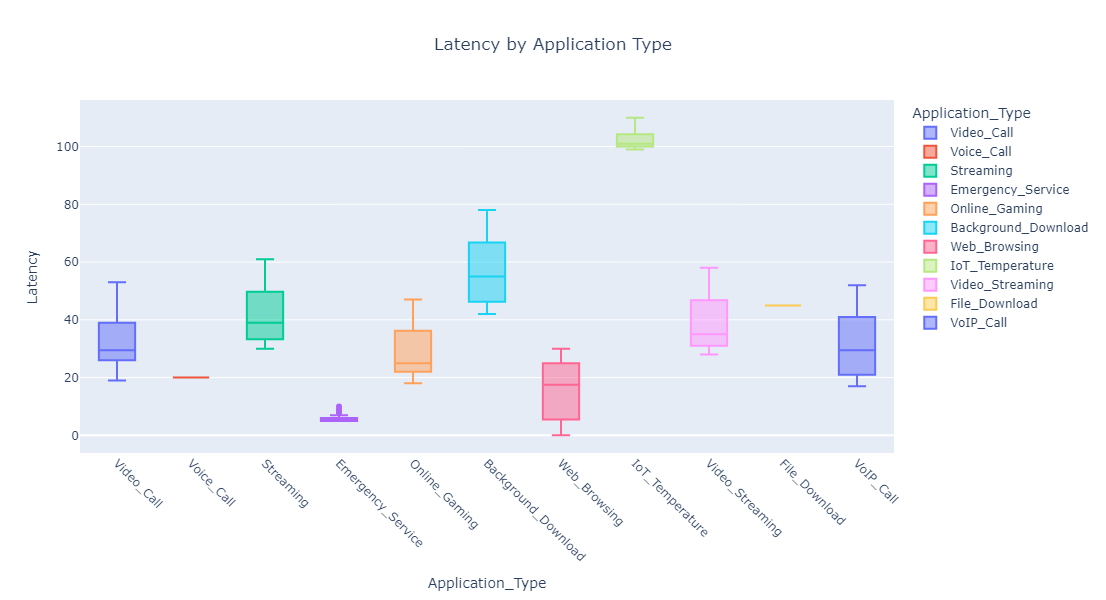

In [67]:
import plotly.express as px

# Assuming 'data' is a pandas DataFrame with columns 'Application_Type' and 'Latency'
fig = px.box(data, x='Application_Type', y='Latency', color='Application_Type', title='Latency by Application Type')

# Update layout for title and x-axis tick rotation
fig.update_layout(
    title={'text': 'Latency by Application Type', 'x': 0.5},
    xaxis={'tickangle': 45},
    width=900,
    height=600
)

# Show the plot
fig.show()

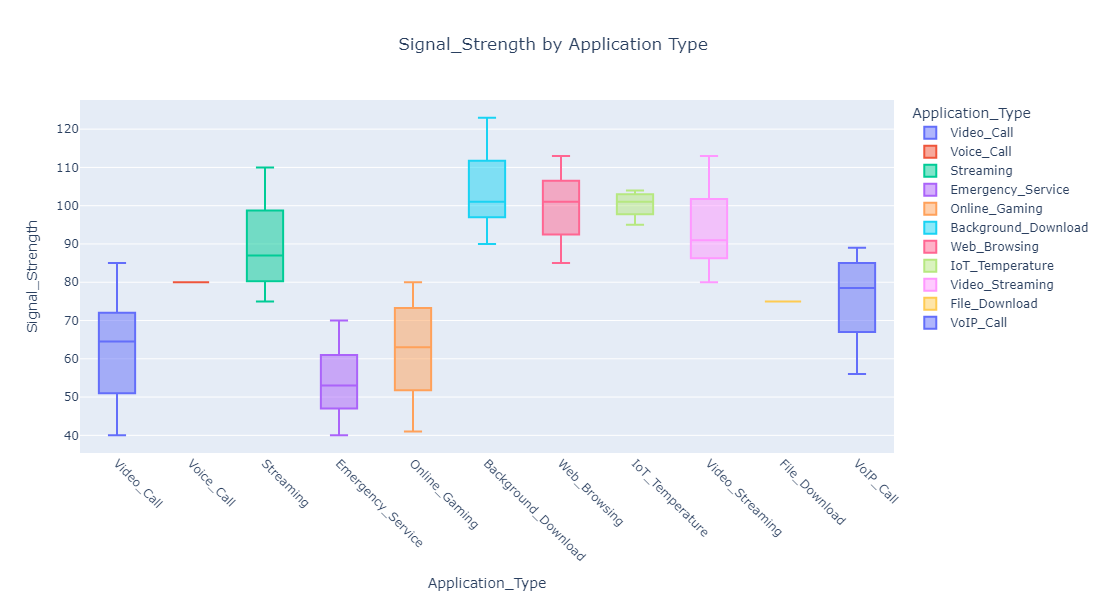

In [68]:
import plotly.express as px

# Assuming 'data' is a pandas DataFrame with columns 'Application_Type' and 'Latency'
fig = px.box(data, x='Application_Type', y='Signal_Strength', color='Application_Type', title='Signal_Strength by Application Type')

# Update layout for title and x-axis tick rotation
fig.update_layout(
    title={'text': 'Signal_Strength by Application Type', 'x': 0.5},
    xaxis={'tickangle': 45},
    width=900,
    height=600
)

# Show the plot
fig.show()

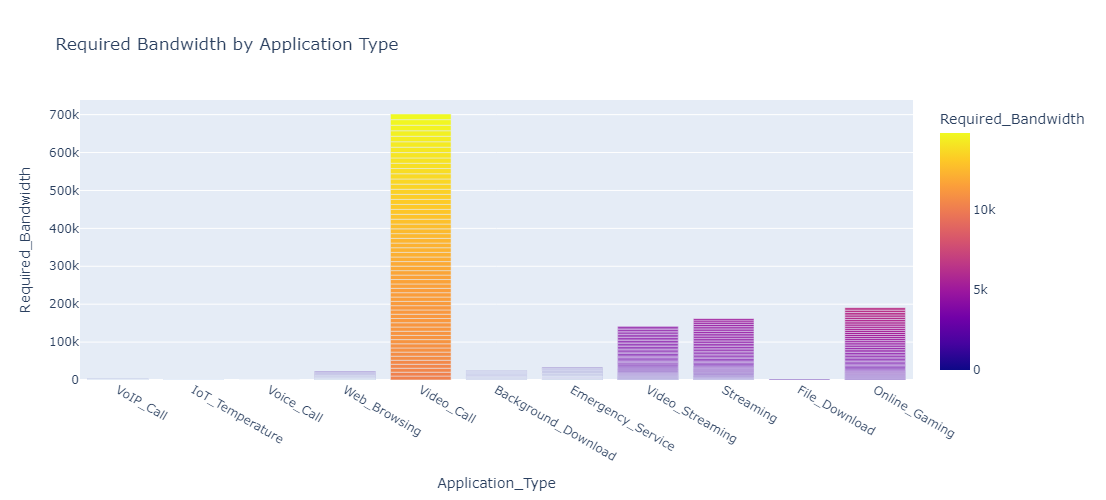

In [69]:
# Sort data by 'Required_Bandwidth'
data_sorted = data.sort_values(by='Required_Bandwidth')

# Create the bar plot using Plotly
fig = px.bar(
    data_sorted,
    x='Application_Type',
    y='Required_Bandwidth',
    color='Required_Bandwidth',  # Different colors for each bar
    #color_continuous_scale='Viridis',  # Optional: set a color scale
    title='Required Bandwidth by Application Type'
)

# Update the layout to match the specified figure size
fig.update_layout(
    width=800,  # 16 inches * 50 pixels per inch
    height=500,  # 10 inches * 50 pixels per inch
)

# Show the plot
fig.show()

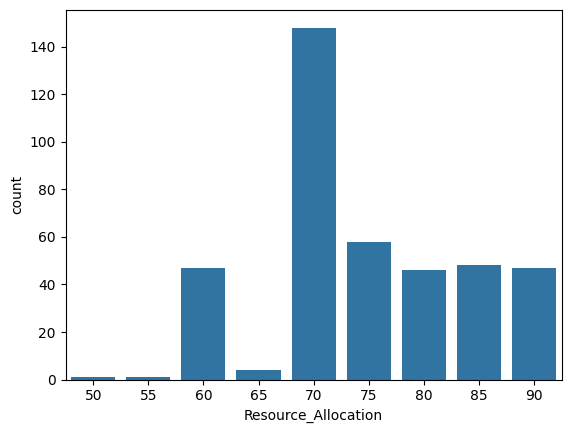

In [71]:
sns.countplot(x=data['Resource_Allocation'])
plt.show()

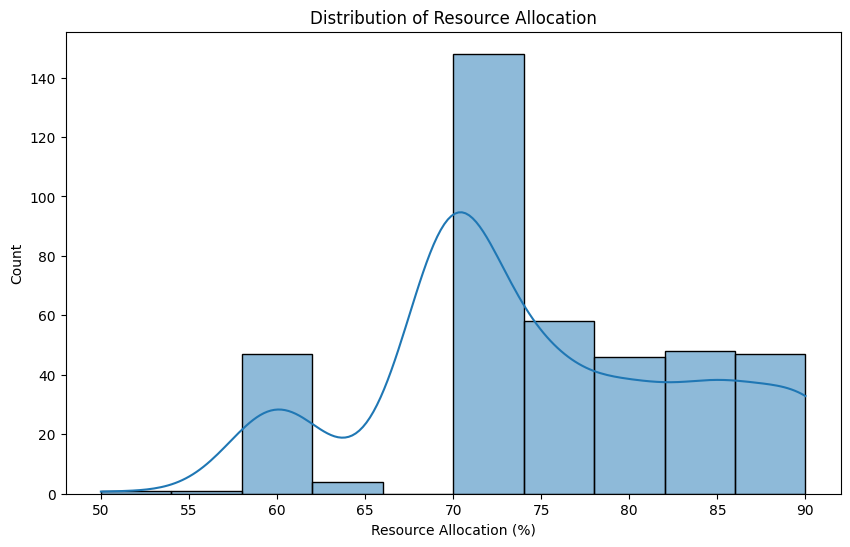

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Resource_Allocation', bins=10 ,kde=True)
plt.title('Distribution of Resource Allocation')
plt.xlabel('Resource Allocation (%)')
plt.ylabel('Count')
plt.show()

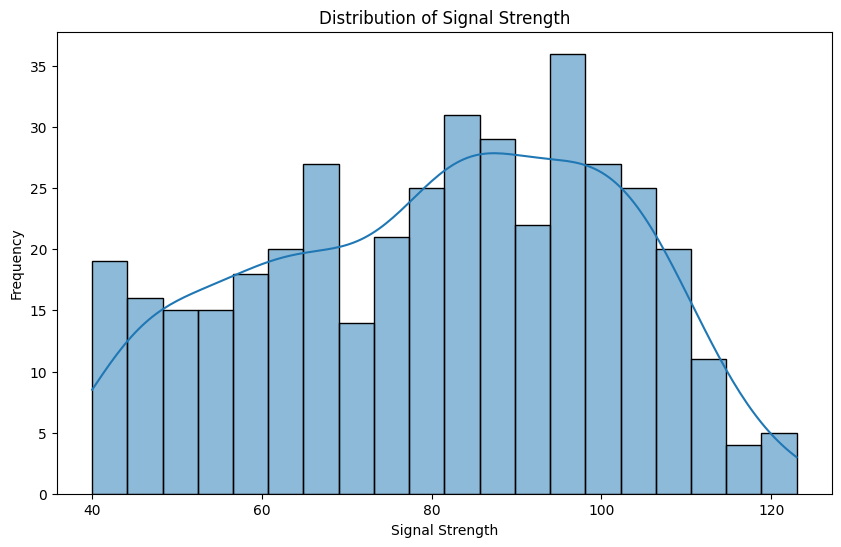

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Signal_Strength', bins=20, kde=True)
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Frequency')
plt.show()

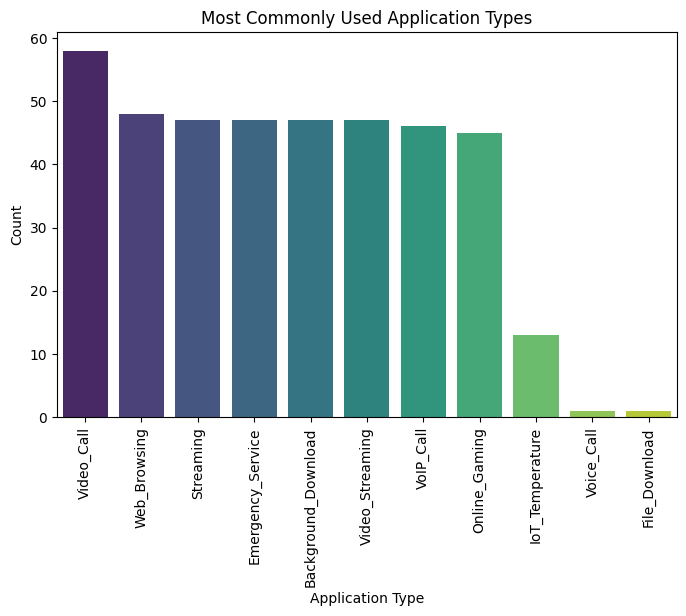

In [77]:
plt.figure(figsize=(8, 5))
application_counts = data['Application_Type'].value_counts()
sns.barplot(x=application_counts.index, y=application_counts.values, palette="viridis")
plt.title('Most Commonly Used Application Types')
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()

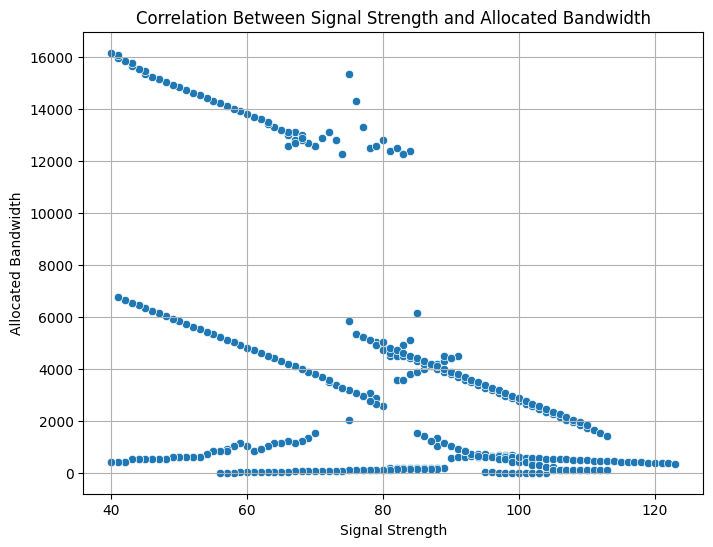

Correlation Coefficient: -0.44728878034938635


In [79]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Signal_Strength', y='Allocated_Bandwidth',)
plt.title('Correlation Between Signal Strength and Allocated Bandwidth')
plt.xlabel('Signal Strength')
plt.ylabel('Allocated Bandwidth')
plt.grid(True)
plt.show()

correlation_coefficient = data['Signal_Strength'].corr(data['Allocated_Bandwidth'])
print(f"Correlation Coefficient: {correlation_coefficient}")

* Negative Correlation: 

### 3. Statistical Analysis
We would like to compare the impact of 'Application Type' to the Resources 'Allocation'

Hypothesis:
* •	Null Hypothesis (H0): There is *NO* difference in the Resources  Allocation  between Application Type
  
* •	Alternative Hypothesis (H1): There is difference in the Resources  Allocation  between Application Type


In [80]:
# Convert Signal_Strength, Latency, Required_Bandwidth, Allocated_Bandwidth, and Resource_Allocation to numerical types
# Converting columns to their appropriate data types for analysis. For example, Signal_Strength is converted from object type to integer.

data = pd.read_csv('5gqos.csv')
data['Signal_Strength'] = data['Signal_Strength'].str.extract('(-\d+)').astype(int)
data['Latency'] = data['Latency'].str.extract('(\d+)').astype(int)
data['Required_Bandwidth'] = data['Required_Bandwidth'].str.extract('(\d+)').astype(float)
data['Allocated_Bandwidth'] = data['Allocated_Bandwidth'].str.extract('(\d+)').astype(float)
data['Resource_Allocation'] = data['Resource_Allocation'].str.extract('(\d+)').astype(int)



In [81]:
# Standardize Signal_Strength and Latency
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Signal_Strength', 'Latency']] = scaler.fit_transform(data[['Signal_Strength', 'Latency']])

# Annotation: Standardizing the Signal_Strength and Latency columns to have zero mean and unit variance.

In [82]:
# Create a new feature: Bandwidth Utilization Ratio
data['Bandwidth_Utilization_Ratio'] = data['Allocated_Bandwidth'] / data['Required_Bandwidth']

# Annotation: Creating a new feature called Bandwidth Utilization Ratio, which is the ratio of Allocated_Bandwidth to Required_Bandwidth. 
# This could enhance the analysis.

In [83]:
# Segment the data based on Application_Type
segmented_data = data.groupby('Application_Type')
print(segmented_data)
# Annotation: The data is segmented based on the 'Application_Type' to facilitate focused analysis on each application type.

In [84]:
import scipy.stats as stats

# Segment the data based on Application_Type
segmented_data = data.groupby('Application_Type')

f_stat, p_value = stats.f_oneway(*[group['Resource_Allocation'].values for name, group in segmented_data])

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant of resoources application difference among the application type.")
else:
    print("Fail to reject the null hypothesis: No significant difference of resources application among the application type.")

F-statistic: 435.5218983437554
P-value: 2.4041349903988285e-204
Reject the null hypothesis: There is a significant of resoources application difference among the application type.


* The ANOVA test showed a significant impact of Application_Type on Resource_Allocation. This suggests that network resources are not uniformly required across different types of applications. Therefore, a dynamic resource allocation strategy should be implemented to optimize network performance for each application type.